In [1]:
import pandas as pd
import numpy as np
from pyalex import Works
import pyalex
pyalex.config.email = "tarakomarecity@gmail.com"

flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

In [2]:
pager = Works().filter(concepts={"id": "C2780616401"})\
            .select(["id", "title", "publication_year", "authorships", "referenced_works"]).paginate(per_page=200, n_max=None)

works_json = []
for page in pager:
    for item in page:
        works_json.append(item)
    print(len(works_json))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20207
20207


In [3]:
works_json

[{'id': 'https://openalex.org/W2032100925',
  'title': 'Opportunities and challenges for a sustainable energy future',
  'publication_year': 2012,
  'authorships': [{'author_position': 'first',
    'author': {'id': 'https://openalex.org/A5001967033',
     'display_name': 'Steven Chu',
     'orcid': 'https://orcid.org/0000-0002-4572-0154'},
    'institutions': [{'id': 'https://openalex.org/I1330989302',
      'display_name': 'United States Department of Energy',
      'ror': 'https://ror.org/01bj3aw27',
      'country_code': 'US',
      'type': 'government',
      'lineage': ['https://openalex.org/I1330989302',
       'https://openalex.org/I2800421839']}],
    'countries': ['US'],
    'is_corresponding': False,
    'raw_author_name': 'Steven Chu',
    'raw_affiliation_string': 'US Department of Energy, 1000 Independence Avenue SW, 20585, Washington DC, USA',
    'raw_affiliation_strings': ['US Department of Energy, 1000 Independence Avenue SW, 20585, Washington DC, USA']},
   {'author_p

In [4]:
years = pd.Series(
    {work['id']: work['publication_year'] for work in works_json},
    name='year'
)
years.index.name = 'eid'

citations_data = []
for work in works_json:
    target_id = work['id']
    for referenced_work in work['referenced_works']:
        citations_data.append({'source': referenced_work, 'target': target_id})
citations_df = pd.DataFrame(citations_data)

team_sizes = pd.Series(
    {work['id']: len(work['authorships']) for work in works_json},
    name='team_size'
)
team_sizes.index.name = 'eid'

display(years, citations_df, team_sizes)

eid
https://openalex.org/W2032100925    2012
https://openalex.org/W4211243502    2000
https://openalex.org/W2113981935    2008
https://openalex.org/W2013513928    2005
https://openalex.org/W2157110881    2010
                                    ... 
https://openalex.org/W4388299008    1993
https://openalex.org/W4388437778    1993
https://openalex.org/W612255889     1993
https://openalex.org/W650922499     1993
https://openalex.org/W853173788     1993
Name: year, Length: 20205, dtype: int64

source                            target
0       https://openalex.org/W1674497224  https://openalex.org/W2032100925
1       https://openalex.org/W1969492379  https://openalex.org/W2032100925
2       https://openalex.org/W1973627561  https://openalex.org/W2032100925
3       https://openalex.org/W1974284808  https://openalex.org/W2032100925
4       https://openalex.org/W1975988200  https://openalex.org/W2032100925
...                                  ...                               ...
219137  https://openalex.org/W2130737278   https://openalex.org/W853173788
219138  https://openalex.org/W2167415203   https://openalex.org/W853173788
219139  https://openalex.org/W2179781529   https://openalex.org/W853173788
219140  https://openalex.org/W2341793478   https://openalex.org/W853173788
219141  https://openalex.org/W2413505584   https://openalex.org/W853173788

[219142 rows x 2 columns]

eid
https://openalex.org/W2032100925     2
https://openalex.org/W4211243502     2
https://openalex.org/W2113981935     3
https://openalex.org/W2013513928     5
https://openalex.org/W2157110881    24
                                    ..
https://openalex.org/W4388299008     1
https://openalex.org/W4388437778     0
https://openalex.org/W612255889      1
https://openalex.org/W650922499      1
https://openalex.org/W853173788      2
Name: team_size, Length: 20205, dtype: int64

In [5]:
def citation_groupby(df_citation):
    '''source,targetのDataFrameを引用先，引用元ごとにgroupby
    
    input: source,targetをcolumnにもつedgeのDataFrame

    index: eid
    source: indexが引用先となる論文群(新)
    target: indexが引用元となる論文群(旧)
    '''
    
    citations_source_gp = df_citation.groupby('source').agg(list)
    citations_target_gp = df_citation.groupby('target').agg(list)
    df_citation_gp = pd.concat([citations_source_gp,citations_target_gp],axis = 1)
    return df_citation_gp

citations_gb = citation_groupby(citations_df)
citations_gb

target  \
https://openalex.org/W10002950      [https://openalex.org/W86425408]   
https://openalex.org/W1000474     [https://openalex.org/W1996501962]   
https://openalex.org/W1000773      [https://openalex.org/W565451181]   
https://openalex.org/W100110760    [https://openalex.org/W654986555]   
https://openalex.org/W1001212476  [https://openalex.org/W4206814421]   
...                                                              ...   
https://openalex.org/W975728780                                  NaN   
https://openalex.org/W98159904                                   NaN   
https://openalex.org/W985408412                                  NaN   
https://openalex.org/W99296729                                   NaN   
https://openalex.org/W994918431                                  NaN   

                                                                             source  
https://openalex.org/W10002950                                                  NaN  
https://openalex.org/W1000474                                                   NaN  
https://openalex.org/W1000773                                                   NaN  
https://openalex.org/W100110760                                                 NaN  
https://openalex.org/W1001212476                                                NaN  
...                                                                             ...  
https://openalex.org/W975728780   [https://openalex.org/W1631114555, https://ope...  
https://openalex.org/W98159904                   [https://openalex.org/W2027162482]  
https://openalex.org/W985408412   [https://openalex.org/W1537808635, https://ope...  
https://openalex.org/W99296729    [https://openalex.org/W78616475, https://opena...  
https://openalex.org/W994918431   [https://openalex.org/W1604541405, https://ope...  

[207761 rows x 2 columns]

In [6]:
def get_score(node):
    try:
        node_r = set(citations_gb.target.loc[node])
        node_r_c = set(flatten2([citations_gb.source.loc[x] for x in node_r])) - set([node])
        node_c = set(citations_gb.source.loc[node])
        allnodes = node_c | node_r_c
        cite_target = node_c - node_r_c
        cite_targetref = node_r_c - node_c
        cite_target_targetref_both = node_r_c & node_c
        score = (len(cite_target)*1 + len(cite_target_targetref_both)*-1 + len(cite_targetref)*0)/len(allnodes)
        return score
    except:
        return None

In [7]:
#eids = citations_gb.index

#from multiprocessing import Pool
#P = Pool(20)
#res = P.map(get_score,eids)
#P.terminate()
#P.close()
#scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
#display(scores, scores[scores[1].notna()])

#scores.index = scores[0]
#scores['year'] = scores[0].map(years)
#display(scores)

In [8]:
eids = citations_gb.index

res = []
for eid in eids:
    res.append(get_score(eid))
scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
display(scores, scores[scores[1].notna()])

scores.index = scores[0]
scores['team_size'] = scores[0].map(team_sizes)
display(scores)

0   1
0         https://openalex.org/W10002950 NaN
1          https://openalex.org/W1000474 NaN
2          https://openalex.org/W1000773 NaN
3        https://openalex.org/W100110760 NaN
4       https://openalex.org/W1001212476 NaN
...                                  ...  ..
207756   https://openalex.org/W975728780 NaN
207757    https://openalex.org/W98159904 NaN
207758   https://openalex.org/W985408412 NaN
207759    https://openalex.org/W99296729 NaN
207760   https://openalex.org/W994918431 NaN

[207761 rows x 2 columns]

0         1
142      https://openalex.org/W103891327  0.000000
461      https://openalex.org/W115571146  0.372549
561      https://openalex.org/W118541636  0.327273
1001     https://openalex.org/W134495116  0.076046
1592    https://openalex.org/W1483093983  0.727273
...                                  ...       ...
195481  https://openalex.org/W4385232165 -0.222222
195606  https://openalex.org/W4387439494 -0.925926
195625  https://openalex.org/W4388097990  1.000000
195682  https://openalex.org/W4389367083  1.000000
198988   https://openalex.org/W959483631  0.750000

[270 rows x 2 columns]

0   1  \
0                                                                        
https://openalex.org/W10002950      https://openalex.org/W10002950 NaN   
https://openalex.org/W1000474        https://openalex.org/W1000474 NaN   
https://openalex.org/W1000773        https://openalex.org/W1000773 NaN   
https://openalex.org/W100110760    https://openalex.org/W100110760 NaN   
https://openalex.org/W1001212476  https://openalex.org/W1001212476 NaN   
...                                                            ...  ..   
https://openalex.org/W975728780    https://openalex.org/W975728780 NaN   
https://openalex.org/W98159904      https://openalex.org/W98159904 NaN   
https://openalex.org/W985408412    https://openalex.org/W985408412 NaN   
https://openalex.org/W99296729      https://openalex.org/W99296729 NaN   
https://openalex.org/W994918431    https://openalex.org/W994918431 NaN   

                                  team_size  
0                                            
https://openalex.org/W10002950          NaN  
https://openalex.org/W1000474           NaN  
https://openalex.org/W1000773           NaN  
https://openalex.org/W100110760         NaN  
https://openalex.org/W1001212476        NaN  
...                                     ...  
https://openalex.org/W975728780         1.0  
https://openalex.org/W98159904          4.0  
https://openalex.org/W985408412         2.0  
https://openalex.org/W99296729          1.0  
https://openalex.org/W994918431         9.0  

[207761 rows x 3 columns]

In [9]:
scores_notna = scores[scores[1].notna() & scores['team_size'].notna()].drop(columns=0)
scores_notna

1  team_size
0                                                    
https://openalex.org/W103891327   0.000000        3.0
https://openalex.org/W115571146   0.372549        5.0
https://openalex.org/W118541636   0.327273        1.0
https://openalex.org/W134495116   0.076046        1.0
https://openalex.org/W1483093983  0.727273        1.0
...                                    ...        ...
https://openalex.org/W4385232165 -0.222222        3.0
https://openalex.org/W4387439494 -0.925926        3.0
https://openalex.org/W4388097990  1.000000        4.0
https://openalex.org/W4389367083  1.000000        3.0
https://openalex.org/W959483631   0.750000        2.0

[270 rows x 2 columns]

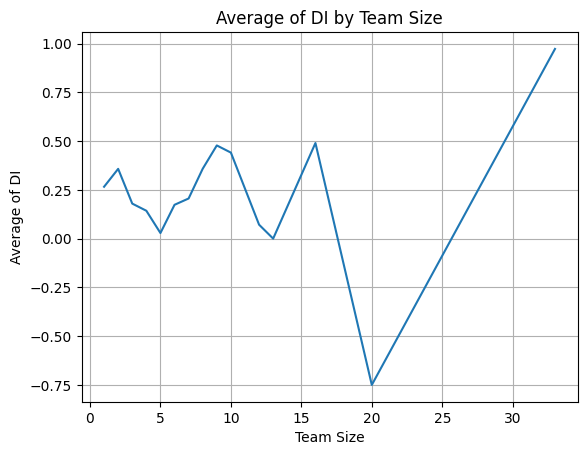

In [10]:
import matplotlib.pyplot as plt

# team_sizeごとにグループ化
grouped_df = scores_notna.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()